## Inter Provincial Quality Education Comparison in Pakistan. 
The dataset comprises university exam results for the years 2022-23. 
Real data consists of around 24,000 semester results (Two years or 04 Semester performance). 
Dataset has presence of students from Provinces: Punjab, Sindh, Balochistan, Khyber Pakhtunkhwa, Federal Capital, FATA, Gilgit-Baltistan and Azad Jammu & Kashmir. 

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import pandas as pd

Dataset file "Student_Performance.xls" has two columns: Column 01 shows the Province of Student and Second one shows his/her Academic Standing or performance

In [4]:
df=pd.read_excel('/workspaces/codespaces-jupyter/data/Students_Performance.xls')
df=df.drop('SR',axis=1)
df=df.dropna()
print('Dataset has Total Records:',df.shape[0])
tot_rec=int(df.shape[0])
Unq_Province=df['PROVINCE'].unique()
print('Students belong to Provinces:', Unq_Province, '\n')

Dataset has Total Records: 23214
Students belong to Provinces: ['AJK' 'Balochistan' 'FATA' 'Federal' 'GB' 'KPK' 'Punjab' 'Sindh'] 



In [21]:
'''Now making Groups on basis of Final_standing achieved by the students after declaration of semester result'''
total=df.groupby(['PROVINCE','FINAL_STANDING'])
temp=total['FINAL_STANDING'].count()
'''After grouping File is saved on Destination'''
df=pd.read_excel('/workspaces/codespaces-jupyter/data/Students_Perf_GP.xls')
''' File written but saved with the same column name as the second was. So name of new(third) column will be changed  '''
df.set_axis(['PROVINCE', 'FINAL_STANDING', 'TOTAL'], axis='columns', inplace=True)
''' Now grouping column has null values. Fill it with the same value as grouped by'''
df['PROVINCE'].fillna(method='ffill',inplace=True)
ndf=pd.DataFrame(df)
ndf.to_excel('/workspaces/codespaces-jupyter/data/Students_Perf_GPWISE.xls')
df=pd.read_excel('/workspaces/codespaces-jupyter/data/Students_Perf_GPWISE.xls')
print('info',df.info())
hold=df.groupby(['PROVINCE'])
hold=hold.sum('TOTAL')
print('Province Wise Students appeared in Exams (2022-23):',hold['TOTAL'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      76 non-null     int64 
 1   PROVINCE        76 non-null     object
 2   FINAL_STANDING  76 non-null     object
 3   TOTAL           76 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.5+ KB
info None
Province Wise Students appeared in Exams (2022-23): PROVINCE
Azad Kashmir            923
Balochistan             143
FATA                    138
Federal Capital        4472
Gilgit-Baltistan        255
Khyber Pakhtunkhwa     2328
Punjab                14514
Sindh                   441
Name: TOTAL, dtype: int64


/tmp/ipykernel_15688/294018398.py:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['PROVINCE', 'FINAL_STANDING', 'TOTAL'], axis='columns', inplace=True)
/tmp/ipykernel_15688/294018398.py:11: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  ndf.to_excel('/workspaces/codespaces-jupyter/data/Students_Perf_GPWISE.xls')


In [39]:
'''Adding a Column to the Dataset with Percentage on Standing from the Province'''
perage=[]
for a in range(df['TOTAL'].count()):
        if df['PROVINCE'][a]=='AJK':
            perage.append((df['TOTAL'][a]/hold['TOTAL'][0])*100)
            continue
        elif df['PROVINCE'][a]=='Balochistan':
            perage.append((df['TOTAL'][a]/hold['TOTAL'][1])*100)
            continue
        elif df['PROVINCE'][a]=='FATA':
            perage.append((df['TOTAL'][a]/hold['TOTAL'][2])*100)
            continue
        elif df['PROVINCE'][a]=='Federal':
            perage.append((df['TOTAL'][a]/hold['TOTAL'][3])*100)
            continue
        elif df['PROVINCE'][a]=='GB':
            perage.append((df['TOTAL'][a]/hold['TOTAL'][4])*100)
            continue
        elif df['PROVINCE'][a]=='KPK':
            perage.append((df['TOTAL'][a]/hold['TOTAL'][5])*100)
            continue
        elif df['PROVINCE'][a]=='Punjab':
            perage.append((df['TOTAL'][a]/hold['TOTAL'][6])*100)
            continue
        else :
            perage.append((df['TOTAL'][a]/hold['TOTAL'][7])*100)

df['Percentage']=perage
ndf=pd.DataFrame(df)
ndf.to_excel('/workspaces/codespaces-jupyter/data/Students_Perf_GPWISEII.xls')
# End of Probability Calculation

/tmp/ipykernel_15688/2347407564.py:30: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  ndf.to_excel('/workspaces/codespaces-jupyter/data/Students_Perf_GPWISEII.xls')


In [36]:
''' Dismissal Cases graph '''
d1=df.query("FINAL_STANDING=='Dismissal'")
d2=d1['Percentage']
''' End of Dismissal Cases '''
''' Warning Cases graph '''
w1=df.query("FINAL_STANDING=='Warning'")
w2=w1['Percentage']
''' End of Warning Cases '''
''' Serious Warning Cases graph '''
sw1=df.query("FINAL_STANDING=='Serious Warning'")
sw2=sw1['Percentage']
''' End of Serious Warning Cases '''
''' Probation Cases graph '''
p1=df.query("FINAL_STANDING=='Probation'")
p2=p1['Percentage']
''' End of Probation Cases '''
''' High Honors Cases graph '''
hh1=df.query("FINAL_STANDING=='High Honors'")
hh2=hh1['Percentage']
lbl_hh=hh1['PROVINCE']
''' End of High Honors Cases '''
''' Honors Cases graph '''
h1=df.query("FINAL_STANDING=='Honors'")
h2=h1['Percentage']
''' End of Honors Cases '''
''' Good Cases graph '''
g1=df.query("FINAL_STANDING=='Good'")
g2=g1['Percentage']
''' End of Good Cases '''
''' Very Good Cases graph '''
vg1=df.query("FINAL_STANDING=='Very Good'")
vg2=vg1['Percentage']
lbl_vg2=vg1['PROVINCE']
''' End of Very Good Cases '''

' End of Very Good Cases '

In [23]:
prv_tot=int(hold['TOTAL'].count())
x=Unq_Province
y=hold['TOTAL']
percentage=[] 
for a in range(prv_tot):
    percentage.append(((hold['TOTAL'][a])/tot_rec)*100)
percentage=[round(num,2) for num in percentage] 
print(percentage)

[3.98, 0.62, 0.59, 19.26, 1.1, 10.03, 62.52, 1.9]


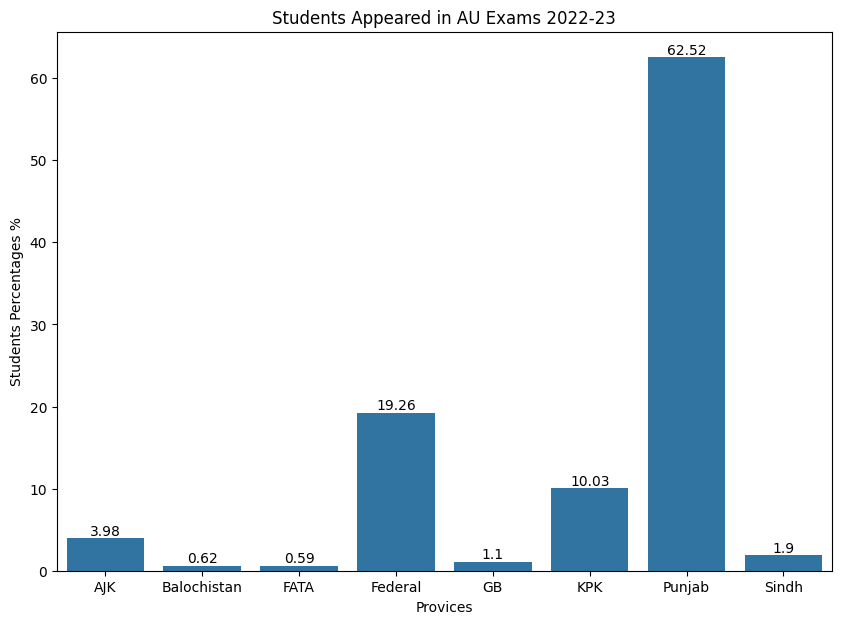

In [29]:
class print_graph:
   def tot_appeared(self,arg1,arg2,arg3):
       self.arg1=arg1 
       self.arg2=arg2 
       self.arg3=arg3
       plt.figure(figsize=(10,7))
      # If want to see graph with student's strength pass y=arg2
       ax=sns.barplot(x=arg1,y=arg3)
       plt.title("Students Appeared in AU Exams 2022-23")
       plt.xlabel("Provices")
       plt.ylabel("Students Percentages %")
       
       for i in ax.containers:
            ax.bar_label(i,)
            plt.show() 
   def piechart(self,arg1,arg2):
       self.arg1=arg1 
       self.arg2=arg2 
       #plt.title("Students Appeared in AU Exams 2022-23")
       lbl=arg2
       palette_color = sns.color_palette('bright')
       plt.pie(arg1, labels=lbl, colors=palette_color, autopct='%.2f%%') 
              
       #for i in ax.containers:
       #     ax.bar_label(i,)
       plt.show()   
obj=print_graph()
obj.tot_appeared(x,y,percentage) 



# Dismissal Cases Breakdown (2022-23)

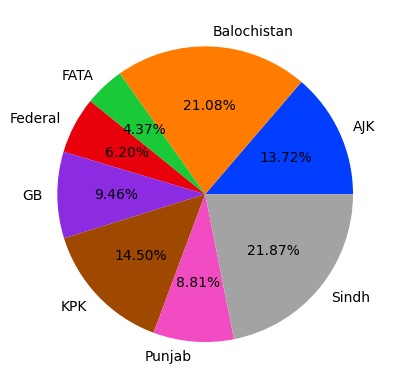

In [26]:
pie=print_graph()
pie.piechart(d2,x)

# Warning Cases Breakdown (2022-23)

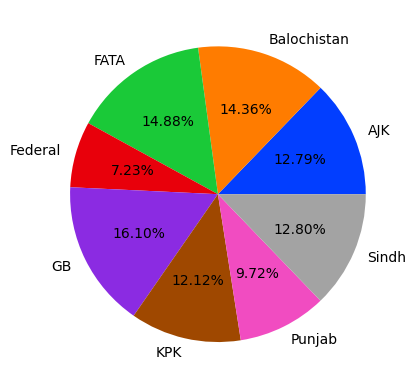

In [27]:
pie=print_graph()
pie.piechart(w2,x)pie=print_graph()
pie.piechart(w2,x)

# Serious Warning Cases (2022-23)

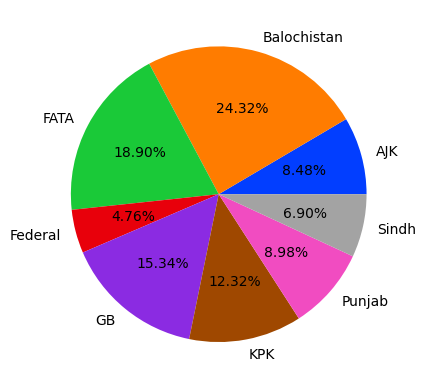

In [28]:
pie=print_graph()
pie.piechart(sw2,x)

# Probation Cases (2022-23)

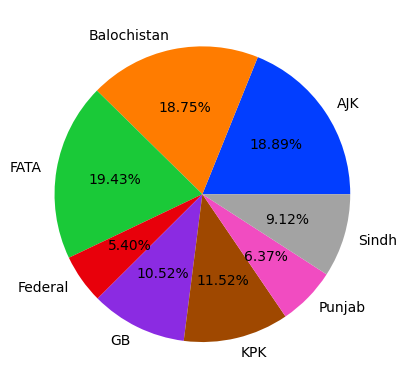

In [30]:
pie=print_graph()
pie.piechart(p2,x)

# Hight Honors Cases (2022-23)


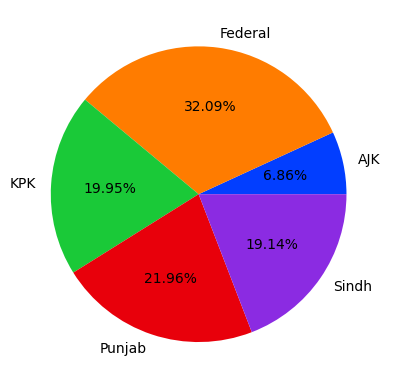

In [32]:
pie=print_graph()
pie.piechart(hh2,lbl_hh)

# Honors Cases (2022-23)

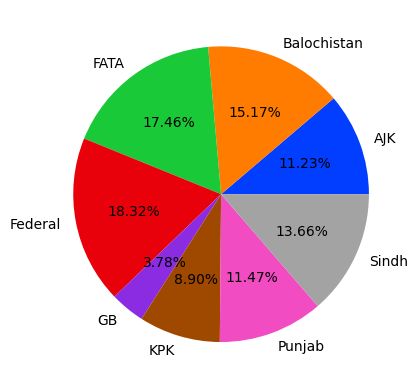

In [33]:
pie=print_graph()
pie.piechart(h2,x)

# Very Good (2022-23)

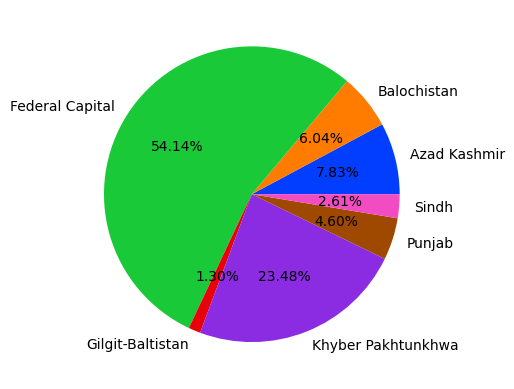

In [37]:
pie=print_graph()
pie.piechart(vg2,lbl_vg2)

# Good Cases (2022-23)

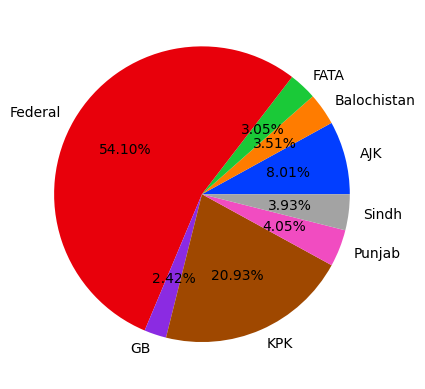

In [38]:
pie=print_graph()
pie.piechart(g2,x)